 <h2 align="center">Hotels  Analysis of AtliQ<h2> 

In [1]:
import pandas as pd

***
**1.Data Exploration**
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read bookings data in a dataframe**

In [2]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')

**Explore bookings data**

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings.shape

(134590, 12)

In [5]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
import matplotlib.pyplot as plt

In [8]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

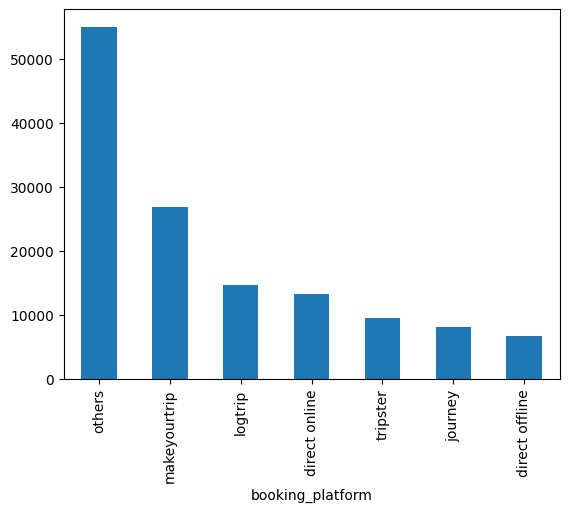

In [9]:
 df_bookings.booking_platform.value_counts().plot(kind="bar")

In [10]:
 df_bookings.describe()


,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Read rest of the  files**

In [11]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [12]:
df_hotels.shape

(25, 4)

In [13]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [14]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

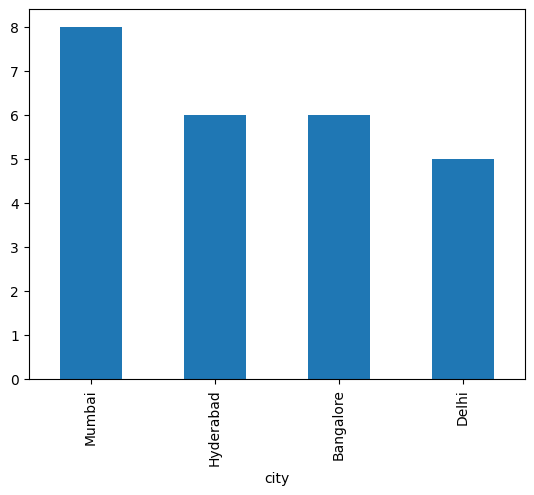

In [15]:
 df_hotels.city.value_counts().plot(kind="bar")

**Reading Fact Aggregated Bookings**

In [16]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [17]:
df_agg_bookings.groupby("property_id")[["successful_bookings"]].sum()

,successful_bookings
property_id,
16558,3153
16559,7338
16560,4693
16561,4418
16562,4820
16563,7211
17558,5053
17559,6142
17560,6013


In [18]:
 df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,01-05-2022,RT1,30,19.0
12,16563,01-05-2022,RT1,100,41.0
4136,19558,11-06-2022,RT2,50,39.0
6209,19560,02-07-2022,RT1,123,26.0
8522,19559,25-07-2022,RT1,35,24.0
9194,18563,31-07-2022,RT4,20,18.0


In [19]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-05-2022,RT2,38,50.0
128,17558,02-05-2022,RT2,27,50.0
229,17558,03-05-2022,RT2,26,50.0
328,17558,04-05-2022,RT2,27,50.0
428,17558,05-05-2022,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-07-2022,RT2,22,50.0
8828,17558,28-07-2022,RT2,21,50.0
8928,17558,29-07-2022,RT2,23,50.0
9028,17558,30-07-2022,RT2,32,50.0


***
   **2.Data Cleaning**
***

In [20]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**(1) Clean invalid(-ve) guests**

In [21]:
df_bookings[df_bookings.no_guests<=0]


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12-05-2022,12-05-2022,14-05-2022,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,08-05-2022,12-05-2022,14-05-2022,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,05-05-2022,12-05-2022,17-05-2022,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10-05-2022,12-05-2022,17-05-2022,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,05-06-2022,08-06-2022,13-06-2022,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-2022,20-07-2022,22-07-2022,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


 The guest count is below zero, it indicates a data error. We can ignore these above records.

In [22]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [23]:
df_bookings.shape

(134578, 12)

**(2) Outlier removal in revenue generated column**

In [24]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [25]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [26]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [27]:
higher_limit = avg + 3*std
higher_limit

294498.50173207896

In [28]:
lower_limit = avg - 3*std
lower_limit

-263742.4278567056

In [29]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [30]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-2022,01-05-2022,02-05-2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-2022,01-05-2022,04-05-2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-2022,28-07-2022,29-07-2022,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [31]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(134573, 12)

**3.Cleaning Revenue Realized Columns**

In [32]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [33]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [34]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-2022,01-05-2022,07-05-2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,01-05-2022,01-05-2022,02-05-2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-2022,01-05-2022,03-05-2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-2022,01-05-2022,07-05-2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-2022,01-05-2022,03-05-2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-2022,31-07-2022,02-08-2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-2022,31-07-2022,01-08-2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-2022,31-07-2022,01-08-2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-2022,31-07-2022,06-08-2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


All rooms are RT4 which is presidential suit and most expensive. We need to do data analysis only on RT4 room types.

In [35]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [36]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit is 50583 and in our dataframe above max value for 
revenue realized is 45220.i.e. **higher limit>max value**.
Hence there is no outlier and no data cleaning  is required.

In [37]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. 
Since there are many rows with null rating, we should not filter these values.
Also we should not replace this rating with a median or mean rating etc

**4. Cleaning Aggregate Bookings Dataset**

In [38]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [39]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,01-05-2022,RT1,22,NaN
14,17562,01-05-2022,RT1,12,NaN


In [40]:
df_agg_bookings.capacity.median()

25.0

In [41]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [42]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,01-05-2022,RT1,22,25.0
15,17563,01-05-2022,RT1,21,25.0


In [43]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,01-05-2022,RT1,30,19.0
12,16563,01-05-2022,RT1,100,41.0
4136,19558,11-06-2022,RT2,50,39.0
6209,19560,02-07-2022,RT1,123,26.0
8522,19559,25-07-2022,RT1,35,24.0
9194,18563,31-07-2022,RT4,20,18.0


***
###  3. Data Transformation
***

**Creating occupancy % column**

In [44]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-05-2022,RT1,25,30.0
1,19562,01-05-2022,RT1,28,30.0
2,19563,01-05-2022,RT1,23,30.0
3,17558,01-05-2022,RT1,30,19.0


In [45]:
 df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

In [46]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-05-2022,RT1,25,30.0,0.833333
1,19562,01-05-2022,RT1,28,30.0,0.933333
2,19563,01-05-2022,RT1,23,30.0,0.766667
3,17558,01-05-2022,RT1,30,19.0,1.578947
4,16558,01-05-2022,RT1,18,19.0,0.947368


In [47]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-05-2022,RT1,25,30.0,83.33
1,19562,01-05-2022,RT1,28,30.0,93.33
2,19563,01-05-2022,RT1,23,30.0,76.67
3,17558,01-05-2022,RT1,30,19.0,157.89
4,16558,01-05-2022,RT1,18,19.0,94.74


***
###  4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [48]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-05-2022,RT1,25,30.0,83.33
1,19562,01-05-2022,RT1,28,30.0,93.33
2,19563,01-05-2022,RT1,23,30.0,76.67


In [49]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    58.232748
RT2    58.040278
RT3    58.028213
RT4    59.300461
Name: occ_pct, dtype: float64

In [50]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,01-05-2022,RT1,25,30.0,83.33,RT1,Standard
1,19562,01-05-2022,RT1,28,30.0,93.33,RT1,Standard
2,19563,01-05-2022,RT1,23,30.0,76.67,RT1,Standard
3,17558,01-05-2022,RT1,30,19.0,157.89,RT1,Standard


In [51]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-05-2022,RT1,25,30.0,83.33,Standard
1,19562,01-05-2022,RT1,28,30.0,93.33,Standard
2,19563,01-05-2022,RT1,23,30.0,76.67,Standard
3,17558,01-05-2022,RT1,30,19.0,157.89,Standard


In [52]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.040278
Premium         58.028213
Presidential    59.300461
Standard        58.232748
Name: occ_pct, dtype: float64

 **2. Print average occupancy rate per city**

In [53]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [54]:
 df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-05-2022,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-05-2022,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-05-2022,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


In [55]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.594207
Delhi        61.606467
Hyderabad    58.144651
Mumbai       57.943142
Name: occ_pct, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [56]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-05-2022,May-22,W 19,weekend
1,02-05-2022,May-22,W 19,weekeday
2,03-05-2022,May-22,W 19,weekeday


In [57]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-05-2022,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-05-2022,May-22,W 19,weekend
1,16559,01-05-2022,RT2,35,41.0,85.37,Elite,Atliq Exotica,Luxury,Mumbai,01-05-2022,May-22,W 19,weekend
2,16559,01-05-2022,RT3,27,32.0,84.38,Premium,Atliq Exotica,Luxury,Mumbai,01-05-2022,May-22,W 19,weekend


In [58]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.82
weekend     74.24
Name: occ_pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [59]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type


In [60]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

Series([], Name: occ_pct, dtype: float64)

IndexError: index 0 is out of bounds for axis 0 with size 0

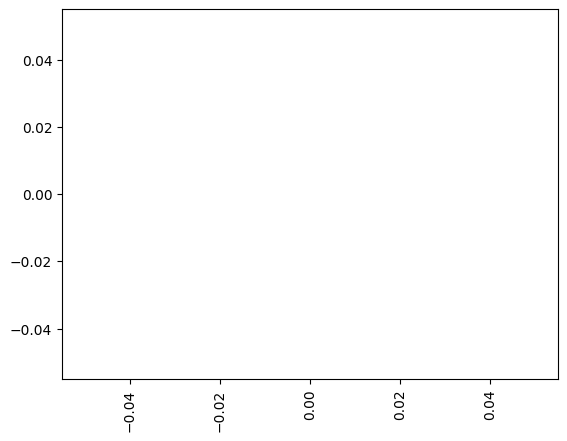

In [61]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

**5: We got new data for the month of august. Append that to existing data**

In [ ]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

In [ ]:
df_august.columns

In [ ]:
df.columns

In [ ]:
df_august.shape

In [ ]:
df.shape

In [ ]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

In [ ]:
latest_df.shape

**6. Print revenue realized per city**

In [62]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [63]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [64]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [65]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [66]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-05-2022,May-22,W 19,weekend
1,02-05-2022,May-22,W 19,weekeday
2,03-05-2022,May-22,W 19,weekeday


In [67]:
df_date["mmm yy"].unique()

array(['May-22', 'Jun-22', 'Jul-22'], dtype=object)

In [68]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [69]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [70]:
df_date["date"] = pd.to_datetime(df_date["date"],format="%d/%m/%Y")
df_date.head(3)

ValueError: time data "01-05-2022" doesn't match format "%d/%m/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [71]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [72]:
 df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

ValueError: time data "13-05-2022" doesn't match format "%m-%d-%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [73]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,W 19,weekend
1,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,W 19,weekend
2,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,01-05-2022,May-22,W 19,weekend


In [74]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul-22    572843348
Jun-22    553925855
May-22    581767396
Name: revenue_realized, dtype: int64

  **8.Revenue realized per Hotel Type**

In [75]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [76]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     66086735
Atliq Grands     211462134
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Palace     304081863
Atliq Exotica    320258588
Name: revenue_realized, dtype: int64

**9.Print average rating per city**

In [77]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

**10.Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

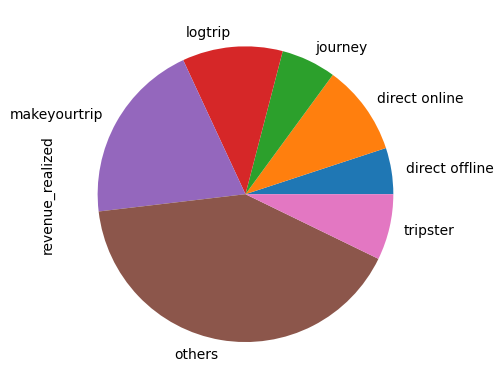

In [78]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")